In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import sqlite3 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# dataset: Hours studied vs Exam Score
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8],
    'Exam_Score': [35, 45, 50, 60, 62, 65, 75, 85]
}
df = pd.DataFrame(data)
df


,Hours_Studied,Exam_Score
0,1,35
1,2,45
2,3,50
3,4,60
4,5,62
5,6,65
6,7,75
7,8,85


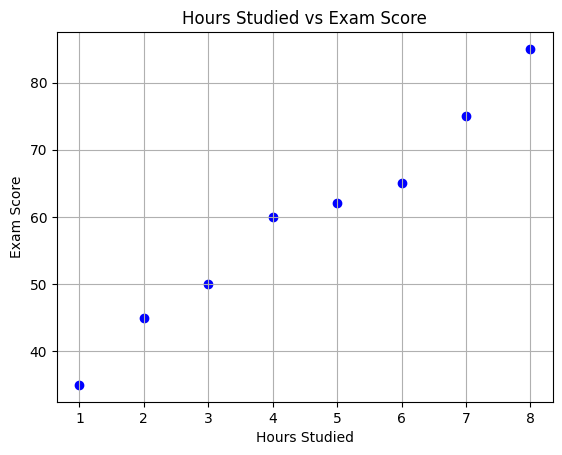

In [3]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue')
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

In [4]:
X = df[['Hours_Studied']]  # Feature (independent variable)
y = df['Exam_Score'] # Target (dependent variable)



In [5]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [6]:
print("Slope (β₁):", model.coef_[0])
print("Intercept (β₀):", model.intercept_)

Slope (β₁): 6.511904761904762
Intercept (β₀): 30.321428571428573


In [7]:
y_pred = model.predict(X)
df['Predicted_Score'] = y_pred
df


,Hours_Studied,Exam_Score,Predicted_Score
0,1,35,36.833333
1,2,45,43.345238
2,3,50,49.857143
3,4,60,56.369048
4,5,62,62.880952
5,6,65,69.392857
6,7,75,75.904762
7,8,85,82.416667


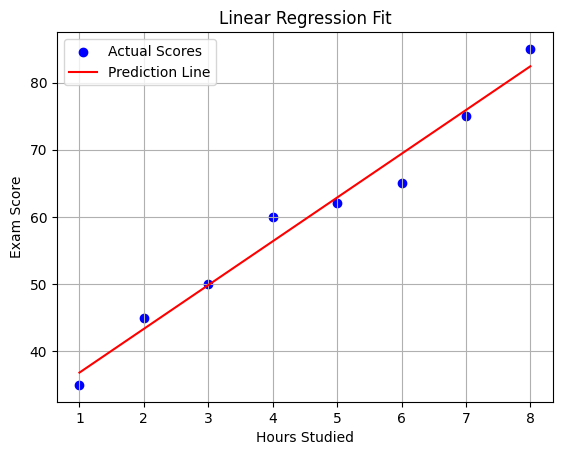

In [8]:
plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X, y_pred, color='red', label='Prediction Line')
plt.title("Linear Regression Fit")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
yresiduals = y - y_pred
df['Residuals'] = yresiduals
df



,Hours_Studied,Exam_Score,Predicted_Score,Residuals
0,1,35,36.833333,-1.833333
1,2,45,43.345238,1.654762
2,3,50,49.857143,0.142857
3,4,60,56.369048,3.630952
4,5,62,62.880952,-0.880952
5,6,65,69.392857,-4.392857
6,7,75,75.904762,-0.904762
7,8,85,82.416667,2.583333


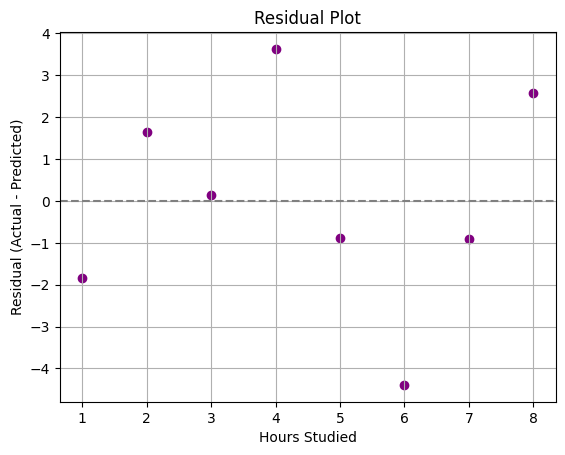

In [10]:
plt.scatter(df['Hours_Studied'], df['Residuals'], color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Hours Studied")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.show()


In [11]:
print("Mean Squared Error (MSE):", mean_squared_error(y, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y, y_pred))
print("R² Score:", r2_score(y, y_pred))


Mean Squared Error (MSE): 5.8586309523809454
Mean Absolute Error (MAE): 2.00297619047619
R² Score: 0.9743587238629295


In [24]:
df.columns = ["Exam_Score", "Hours_Studied"]
model=smf.ols(formula='Exam_Score ~ Hours_Studied',data=df).fit()


In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 13 May 2025   Prob (F-statistic):           1.14e-20
Time:                        16:44:56   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.3832      0.327     -7.281

In [27]:
results = smf.ols(formula='Exam_Score ~  Hours_Studied', data=df).fit()
results

In [30]:
#prediction
df['Predict_Exam_Score'] = results.predict(df)
df.head()

,Exam_Score,Hours_Studied,PredictedSalary,Predict_Exam_Score
0,1.1,39343,1.600934,1.600934
1,1.3,46205,2.295819,2.295819
2,1.5,37731,1.437694,1.437694
3,2.0,43525,2.024427,2.024427
4,2.2,39891,1.656428,1.656428


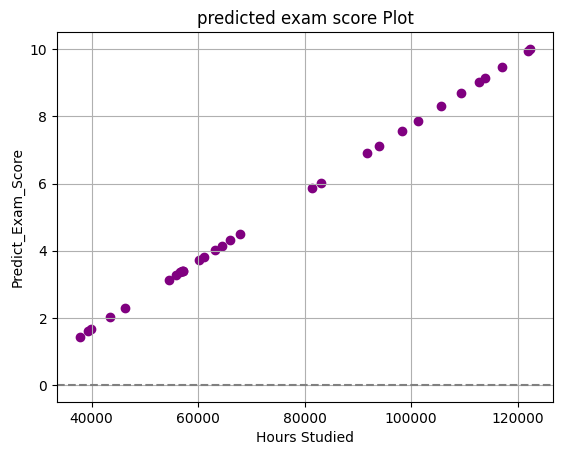

In [32]:
plt.scatter(df['Hours_Studied'], df['Predict_Exam_Score'], color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("predicted exam score Plot")
plt.xlabel("Hours Studied")
plt.ylabel("Predict_Exam_Score")
plt.grid(True)
plt.show()